In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import joblib
import seaborn as sns

In [33]:
current_dir=os.getcwd()
print(current_dir)

/Users/ashutoshthapa/Documents/irrigation system


In [35]:
df=pd.read_csv("/Users/ashutoshthapa/Documents/irrigation system/weather.csv")

In [37]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,Yes
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,Yes
2,13.7,23.4,NW,85.0,69,1007.2,20.2,Yes
3,13.3,15.5,NW,54.0,56,1007.0,14.1,Yes
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,No
...,...,...,...,...,...,...,...,...
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,No
362,7.1,28.4,N,48.0,22,1016.9,28.2,No
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,No
364,12.5,26.9,NW,46.0,39,1016.2,25.9,No


In [39]:
df.shape

(366, 8)

In [41]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
WindGustDir      3
WindGustSpeed    2
Humidity         0
Pressure         0
Temp             0
RainTomorrow     0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [45]:
df=df.dropna(subset=['WindGustDir','WindGustSpeed'])
df=df.dropna(subset=['RainTomorrow'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        363 non-null    float64
 1   MaxTemp        363 non-null    float64
 2   WindGustDir    363 non-null    object 
 3   WindGustSpeed  363 non-null    float64
 4   Humidity       363 non-null    int64  
 5   Pressure       363 non-null    float64
 6   Temp           363 non-null    float64
 7   RainTomorrow   363 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 25.5+ KB


In [49]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     297
Yes     66
Name: count, dtype: int64

In [51]:
df.describe()

,MinTemp,MaxTemp,WindGustSpeed,Humidity,Pressure,Temp
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,7.297796,20.584022,39.884298,44.495868,1016.768044,19.259229
std,6.027620,6.702030,13.051231,16.918291,6.463307,6.653636
min,-5.300000,7.600000,13.000000,13.000000,996.800000,5.100000
25%,2.300000,15.050000,31.000000,32.000000,1012.750000,14.200000
50%,7.500000,19.700000,39.000000,43.000000,1017.400000,18.600000
75%,12.500000,25.600000,46.000000,55.000000,1021.450000,24.050000
max,20.900000,35.800000,98.000000,96.000000,1033.200000,34.500000


In [53]:
df.tail()


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,No
362,7.1,28.4,N,48.0,22,1016.9,28.2,No
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,No
364,12.5,26.9,NW,46.0,39,1016.2,25.9,No
365,12.3,30.2,NW,78.0,13,1009.2,28.6,No


/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


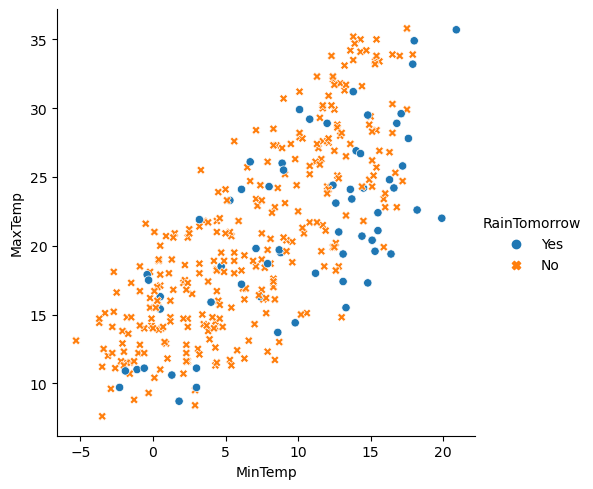

In [105]:
sns.relplot(data=df,x="MinTemp",y="MaxTemp",hue="RainTomorrow",style="RainTomorrow")
plt.show()

/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


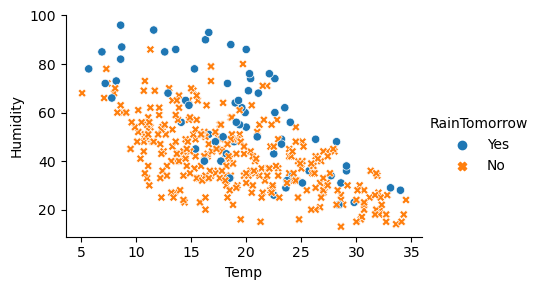

In [99]:
sns.relplot(data=df,x="Temp",y="Humidity",col="WindGustDir",hue="RainTomorrow",style="RainTomorrow",height=3,aspect=1.5 )
plt.show()

/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


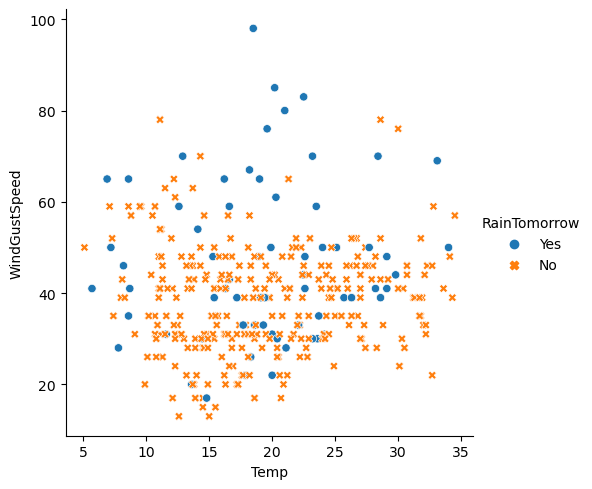

In [107]:
sns.relplot(data=df,x="Temp",y="WindGustSpeed",hue="RainTomorrow",style="RainTomorrow")
plt.show()

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))


In [15]:
col=['MinTemp','MaxTemp','WindGustSpeed','Humidity','Pressure','Temp']
df[col]=scaler.fit_transform(df[col])

In [16]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,0.507634,0.592199,NW,0.200000,0.192771,0.500000,0.629252,Yes
1,0.736641,0.684397,ENE,0.305882,0.277108,0.318681,0.700680,Yes
2,0.725191,0.560284,NW,0.847059,0.674699,0.285714,0.513605,Yes
3,0.709924,0.280142,NW,0.482353,0.518072,0.280220,0.306122,Yes
4,0.492366,0.301418,SSE,0.435294,0.433735,0.596154,0.350340,No
...,...,...,...,...,...,...,...,...
361,0.545802,0.819149,NNW,0.741176,0.024096,0.384615,0.846939,No
362,0.473282,0.737589,N,0.411765,0.108434,0.552198,0.785714,No
363,0.679389,0.436170,ESE,0.352941,0.409639,0.714286,0.448980,No
364,0.679389,0.684397,NW,0.388235,0.313253,0.532967,0.707483,No


In [17]:
label=LabelEncoder()

In [18]:
df['WindGustDir']=label.fit_transform(df['WindGustDir'])
df['RainTomorrow']=label.fit_transform(df['RainTomorrow'])

In [19]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,0.507634,0.592199,7,0.200000,0.192771,0.500000,0.629252,1
1,0.736641,0.684397,1,0.305882,0.277108,0.318681,0.700680,1
2,0.725191,0.560284,7,0.847059,0.674699,0.285714,0.513605,1
3,0.709924,0.280142,7,0.482353,0.518072,0.280220,0.306122,1
4,0.492366,0.301418,10,0.435294,0.433735,0.596154,0.350340,0
...,...,...,...,...,...,...,...,...
361,0.545802,0.819149,6,0.741176,0.024096,0.384615,0.846939,0
362,0.473282,0.737589,3,0.411765,0.108434,0.552198,0.785714,0
363,0.679389,0.436170,2,0.352941,0.409639,0.714286,0.448980,0
364,0.679389,0.684397,7,0.388235,0.313253,0.532967,0.707483,0


In [20]:
df['Temp']

0      0.629252
1      0.700680
2      0.513605
3      0.306122
4      0.350340
         ...   
361    0.846939
362    0.785714
363    0.448980
364    0.707483
365    0.799320
Name: Temp, Length: 363, dtype: float64

In [21]:
temp_scaler = MinMaxScaler(feature_range=(0, 1))
humi_scaler = MinMaxScaler(feature_range=(0, 1))
pres_scaler = MinMaxScaler(feature_range=(0, 1))
wind_scaler = MinMaxScaler(feature_range=(0, 1))
le=LabelEncoder()


In [35]:
temp_scaler.fit(df[['MinTemp', 'MaxTemp', 'Temp']])
humi_scaler.fit(df[['Humidity']])
pres_scaler.fit(df[['Pressure']])
wind_scaler.fit(df[['WindGustSpeed']])
le.fit(df[['WindGustDir']])

/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [37]:
joblib.dump(temp_scaler, 'temp_scaler.pkl')
joblib.dump(humi_scaler, 'humidity_scaler.pkl')
joblib.dump(pres_scaler, 'pressure_scaler.pkl')
joblib.dump(wind_scaler, 'wind_scaler.pkl')
joblib.dump(le,'wind_dir.pkl')

['wind_dir.pkl']

In [39]:

def create_sequences(df,time_steps=7):
    data=df.values
    x,y=[],[]
    for i in range(len(data)-time_steps):
        x.append(data[i:(i+time_steps),:-1])
        y.append(data[i+time_steps,-1])
    return np.array(x),np.array(y)    

In [41]:
time_steps=7
x,y=create_sequences(df,time_steps)
split_num=1

In [43]:
assert len(x) == len(y)
x_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False)

#### using TimeSeriesSplit because data has a temporal(time-based) structure.
#### future values must not see future data during training
#### example- you want realistic validation (like training on jan-march and validating on april)

In [46]:
tscv=TimeSeriesSplit(n_splits=5)

In [48]:
print(x.shape)
print(y.shape)

(356, 7, 7)
(356,)


In [50]:
for train_idx,val_idx in tscv.split(x_train):
    print(f"\n fold{split_num}")
    split_num+=1
    X_train_fold, X_val = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val = y_train[train_idx], y_train[val_idx]

    model=Sequential([
        LSTM(64,input_shape=(X_train_fold.shape[1],X_train_fold.shape[2])),
        Dense(1,activation='sigmoid')
    ])
    optimizer=Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    model.fit(X_train_fold,y_train_fold,epochs=50,batch_size=32,validation_data=(X_test,y_test))
    


 fold1


2025-05-12 09:36:30.517025: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-05-12 09:36:30.517117: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-12 09:36:30.517136: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-05-12 09:36:30.517396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-12 09:36:30.517432: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequenti

Epoch 1/50


2025-05-12 09:36:30.956490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.2842 - loss: 0.7635 - val_accuracy: 0.1389 - val_loss: 0.7591
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3187 - loss: 0.7180 - val_accuracy: 0.4028 - val_loss: 0.6954
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6365 - loss: 0.6844 - val_accuracy: 0.8611 - val_loss: 0.6400
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6949 - loss: 0.6591 - val_accuracy: 0.8611 - val_loss: 0.5919
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7366 - loss: 0.6289 - val_accuracy: 0.8611 - val_loss: 0.5514
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7054 - loss: 0.6190 - val_accuracy: 0.8611 - val_loss: 0.5195
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7054 - loss: 0.6055 - val_accuracy: 0.8611 - val_loss: 0.4929
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7158 - loss: 0.5929 - val_accuracy: 0.8611 - val_loss: 0.4714
Epoch 9/50

In [51]:
loss,accuracy=model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.4126 


model=Sequential([
    LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])),
    Dense(1,activation='sigmoid')
])

## adding learning rate in optimizers to improve the model

optimizer=Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

loss,accuracy=model.evaluate(X_test,y_test)

### i faced a problem in calculating the loss function because me target column had a null values, so i dropped the rows rith null values in the target column

#### np.isnan(X_train).any()


#### np.isinf(X_train).any()

In [61]:
model.save("weather_prediction_lstm_model.keras")